### Transmission results plot

In [9]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from constants import ENERGY_HUBS
from matplotlib.lines import Line2D

CASES = ["base", "NOgrid"]

DF_BY_CASES = dict({})

for case in CASES:
    _df = pd.read_csv(f'new/{case}/results_output_transmission.csv')
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'base':            BetweenNode  AndNode     Period  transmissionInvCap_MW  \
 0          Switzerland  Austria  2020-2025           0.000000e+00   
 1          Switzerland  Austria  2025-2030           0.000000e+00   
 2          Switzerland  Austria  2030-2035           3.720390e+02   
 3          Switzerland  Austria  2035-2040           6.279607e+02   
 4          Switzerland  Austria  2040-2045           1.000000e+03   
 ...                ...      ...        ...                    ...   
 3819  EnergyhubCentral  Germany  2035-2040           1.613436e+03   
 3820  EnergyhubCentral  Germany  2040-2045           6.646874e+03   
 3821  EnergyhubCentral  Germany  2045-2050           7.535213e-04   
 3822  EnergyhubCentral  Germany  2050-2055           3.552977e-07   
 3823  EnergyhubCentral  Germany  2055-2060           2.322881e-05   
 
       transmissionInstalledCap_MW  DiscountedInvestmentCost_EuroPerMW  \
 0                     1200.000000                        0.000000e+00   
 1

In [10]:
# Import lat/lon of all nodes
LATLON = pd.read_csv("../EMPIRE_extension/Output/nodes.csv").drop(columns=["geometry"])
LATLON["Node"] = LATLON["Node"].apply(lambda s: s.replace(" ", ""))

ENERGY_HUBS = [hub.replace(" ", "") for hub in ENERGY_HUBS]

#### Europe plot

In [13]:
def plot_transmission_lines_Europe(case, _df):
    print(f'Transmission capacity Europe for case: {case}')
    # Set 2050 
    df = _df[_df["Period"] == "2045-2050"]

    # Remove 0-connections
    df = df[df["transmissionInstalledCap_MW"] > 1].reset_index(drop=True)
    
    custom_lines = [Line2D([0], [0], color='black', linewidth=1/3),
                Line2D([0], [0], color='black', linewidth=5/3),
                Line2D([0], [0], color='black', linewidth=10/3),
                Line2D([0], [0], color='black', linewidth=20/3),
                Line2D([0], [0], color='black', linewidth=30/3)]
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection=ccrs.Orthographic())
    ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), alpha=.5)
    ax.add_feature(cartopy.feature.LAND.with_scale('50m'), facecolor="white")
    ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))

    # Keep track of used nodes 
    used_nodes = set([])

    # Plot connections
    for _, df_row in df.iterrows():
        used_nodes.add(df_row["BetweenNode"])
        used_nodes.add(df_row["AndNode"])

        plt.plot([LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Longitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Longitude"].values[0]],\
                [LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Latitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Latitude"].values[0]],
                    color = 'black',
                    linewidth = df_row["transmissionInstalledCap_MW"]/3000,
                    transform=ccrs.Geodetic())
        
    # Plot nodes (only those in use/with transmission capacity)
    for _, latlon_row in LATLON.iterrows():
        if latlon_row["Node"] not in used_nodes:
            continue
        plt.plot(latlon_row["Longitude"], latlon_row["Latitude"],
            marker = 's' if latlon_row["Node"] in ENERGY_HUBS else 'o',
            color = 'blue' if latlon_row["Node"] in ENERGY_HUBS else 'black',
            markersize=10,
            transform=ccrs.Geodetic()
        )

    ax.set_extent([-7, 17, 43, 72], crs=ccrs.PlateCarree())
    ax.legend(custom_lines, ['  1 GW', '  5 GW', '  10 GW','  20 GW', '  30 GW'], borderpad=1, labelspacing=1, handlelength=7, loc="upper left", fontsize=20)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-5, 0, 5, 10, 15, 20])
    gl.ylocator = mticker.FixedLocator([45, 50, 55, 60, 65, 70, 75])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}
    #plt.savefig(f"SavedFigs/trans_lines_Europe_{case}", bbox_inches='tight')
    plt.show()

Transmission capacity Europe for case: base


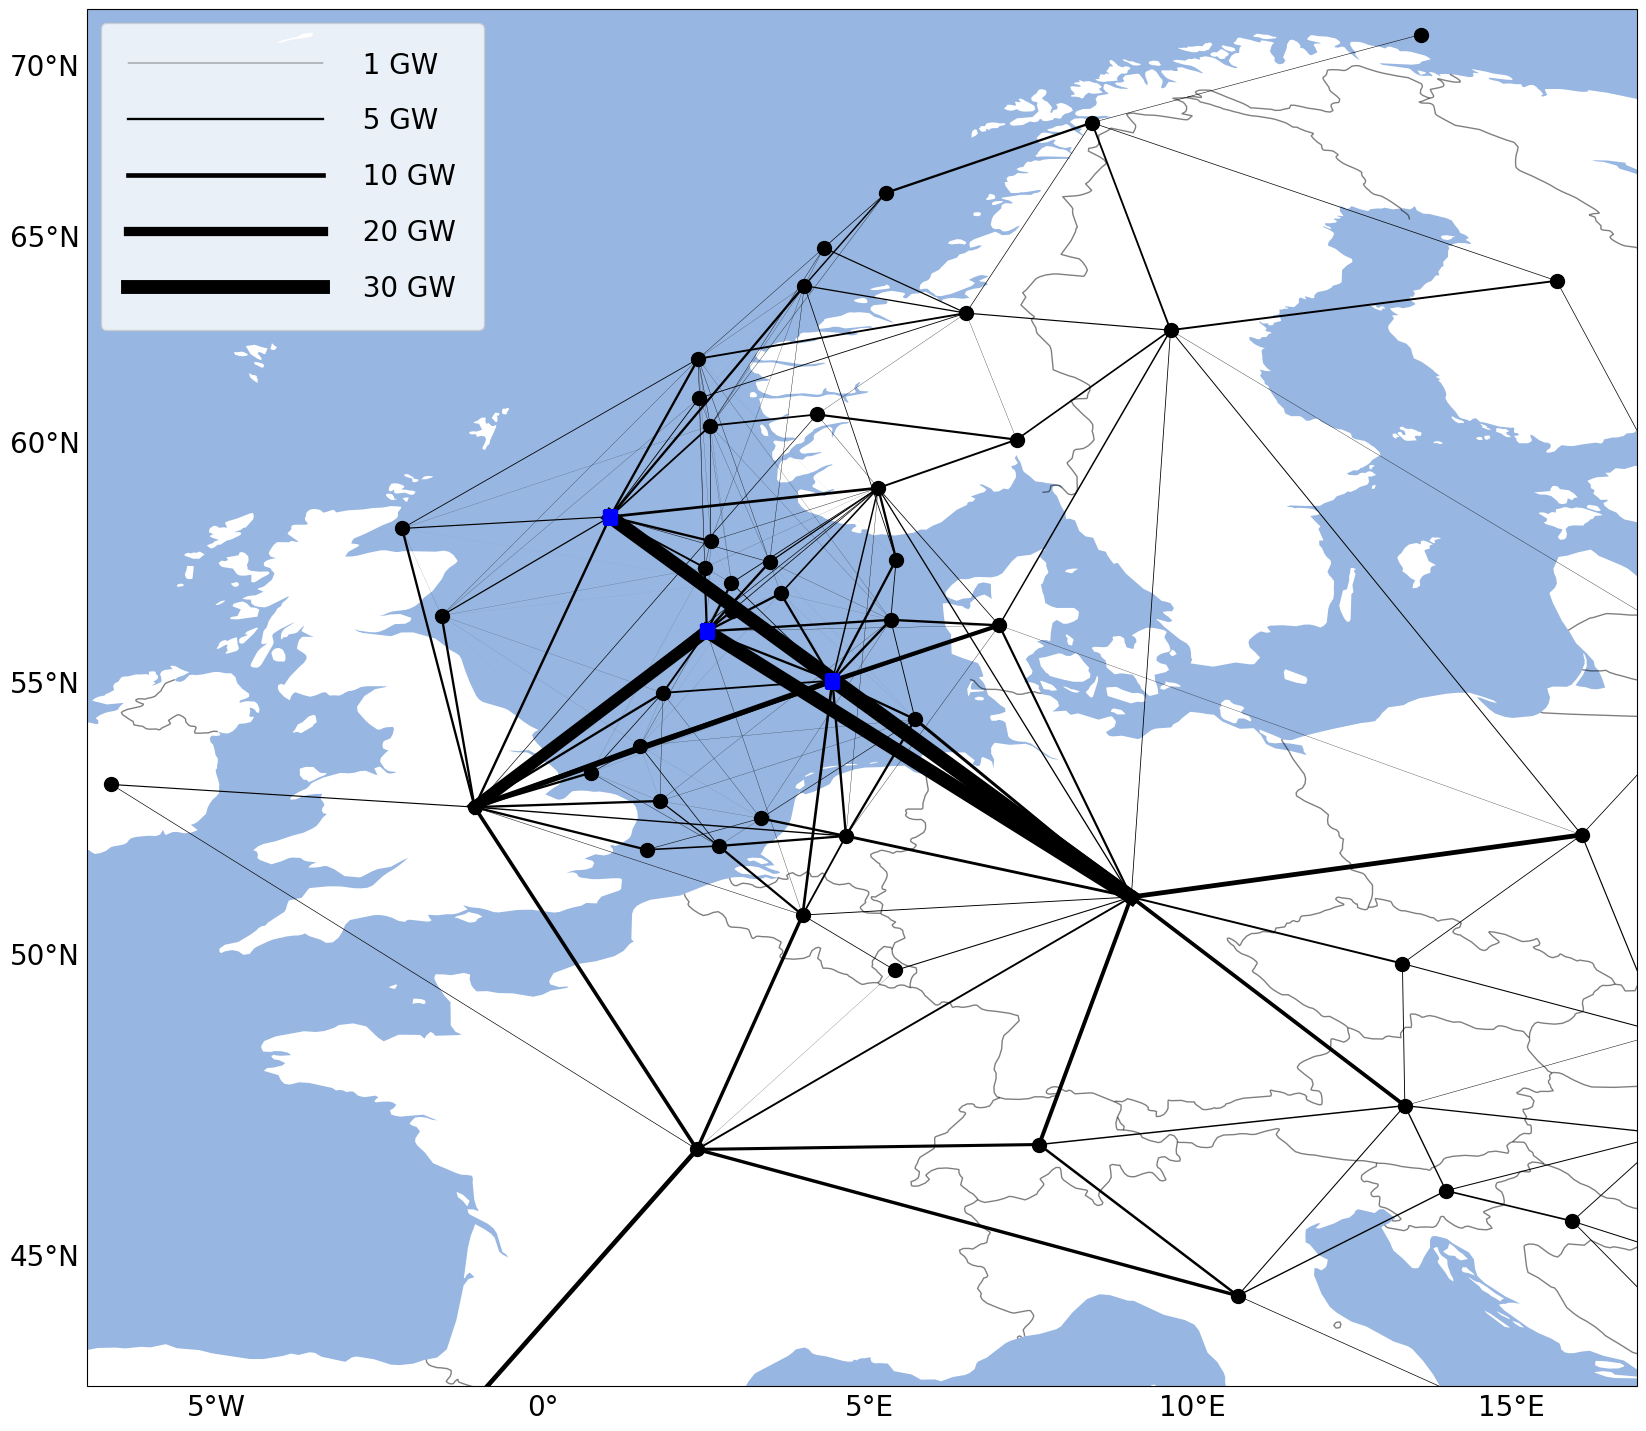

Transmission capacity Europe for case: NOgrid


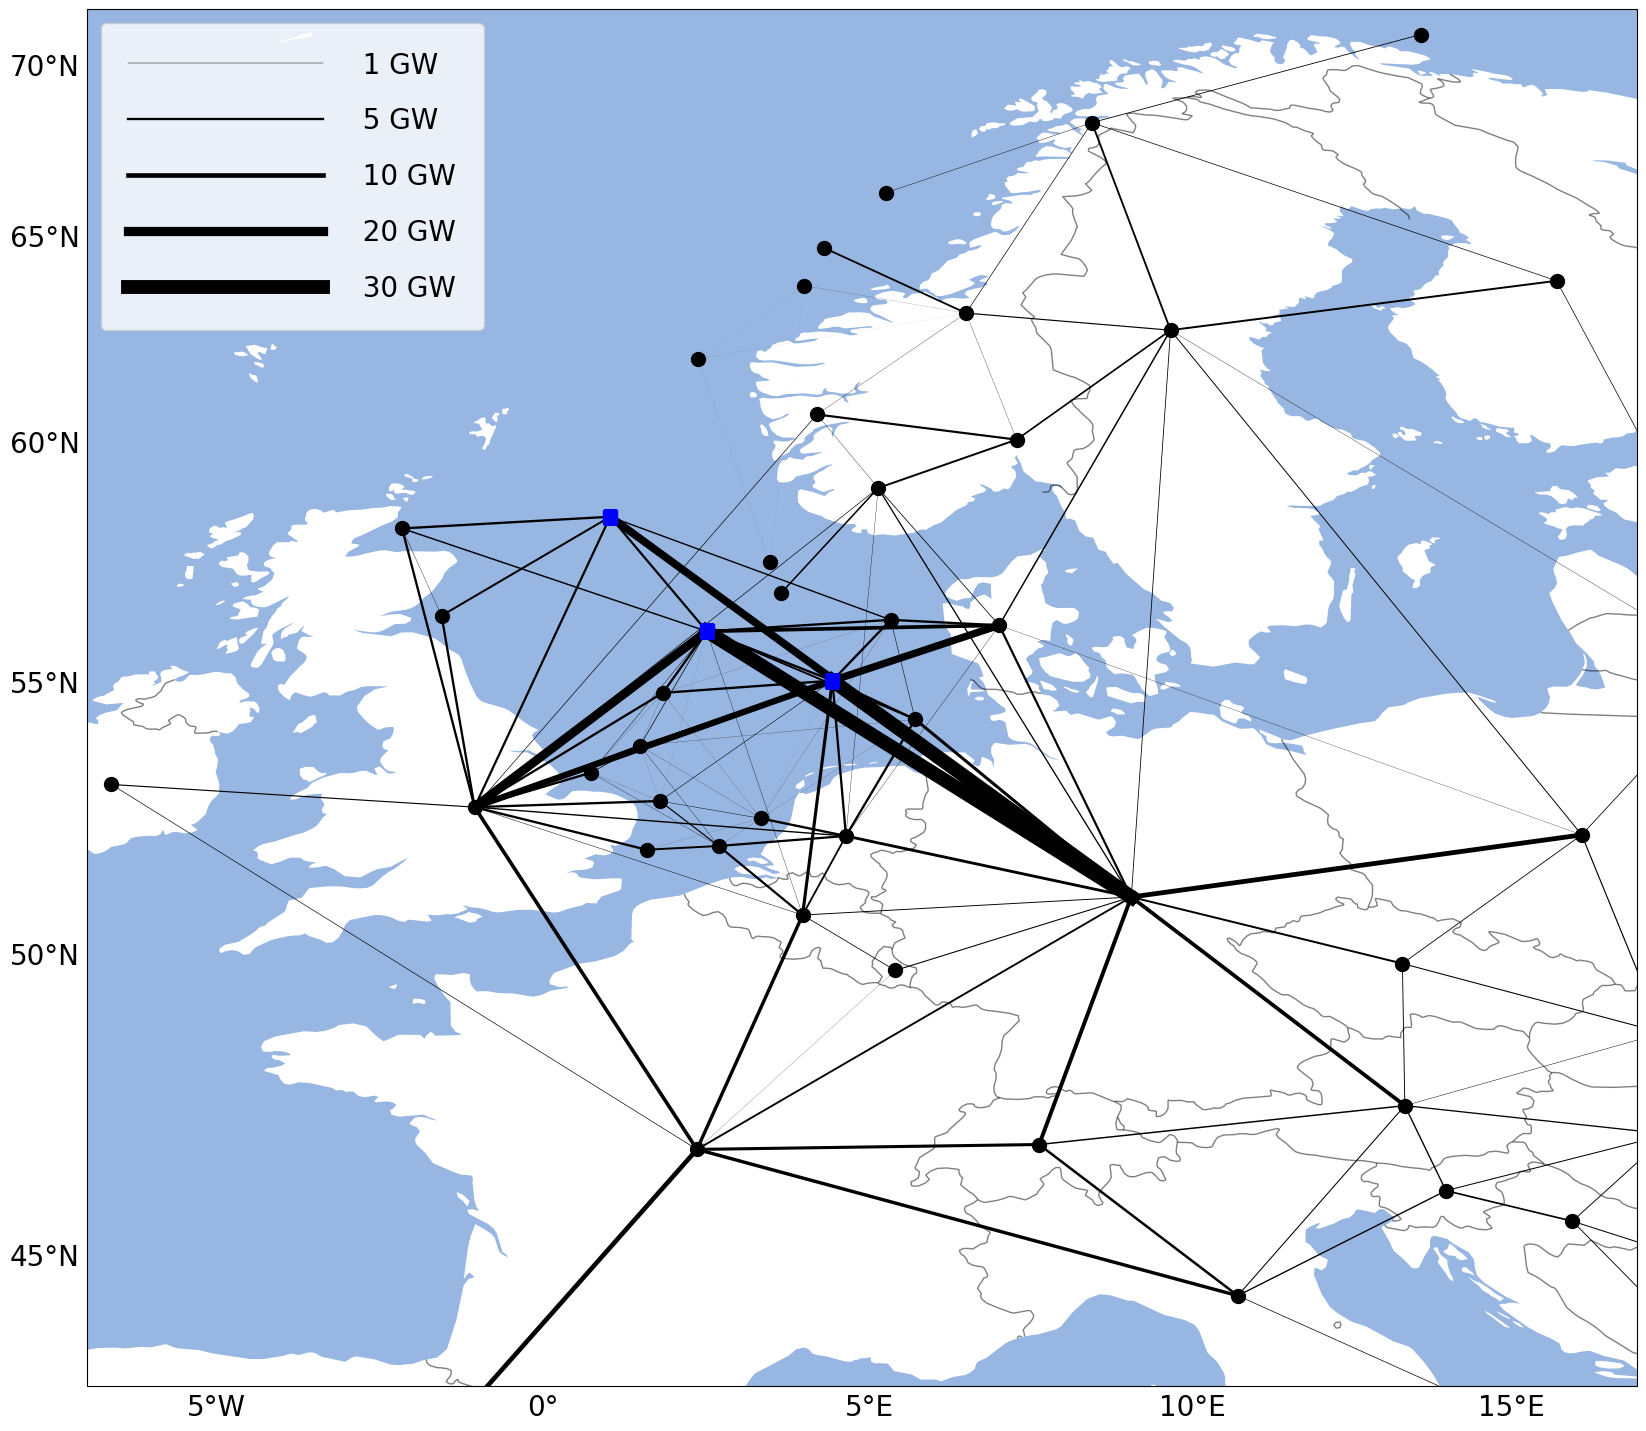

In [14]:
for case, _df in DF_BY_CASES.items():
    plot_transmission_lines_Europe(case, _df)

#### North Sea Plot

In [17]:
def plot_transmission_lines_NS(case, _df):
    print(f'Transmission capacity North Sea in 2050 for case: {case}')
    # Set 2050 
    df = _df[_df["Period"] == "2045-2050"]

    # Remove 0-connections
    df = df[df["transmissionInstalledCap_MW"] > 1].reset_index(drop=True)
    
    custom_lines = [Line2D([0], [0], color='black', linewidth=1/3),
                Line2D([0], [0], color='black', linewidth=5/3),
                Line2D([0], [0], color='black', linewidth=10/3),
                Line2D([0], [0], color='black', linewidth=20/3),
                Line2D([0], [0], color='black', linewidth=30/3)]
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection=ccrs.Orthographic())
    ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), alpha=.5)
    ax.add_feature(cartopy.feature.LAND.with_scale('50m'), facecolor="white")
    ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))

    # Keep track of used nodes 
    used_nodes = set([])

    # Plot connections
    for _, df_row in df.iterrows():
        used_nodes.add(df_row["BetweenNode"])
        used_nodes.add(df_row["AndNode"])

        plt.plot([LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Longitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Longitude"].values[0]],\
                [LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Latitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Latitude"].values[0]],
                    color = 'black',
                    linewidth = df_row["transmissionInstalledCap_MW"]/3000,
                    transform=ccrs.Geodetic())
        
    # Plot nodes (only those in use/with transmission capacity)
    for _, latlon_row in LATLON.iterrows():
        if latlon_row["Node"] not in used_nodes:
            continue
        plt.plot(latlon_row["Longitude"], latlon_row["Latitude"],
            marker = 's' if latlon_row["Node"] in ENERGY_HUBS else 'o',
            color = 'blue' if latlon_row["Node"] in ENERGY_HUBS else 'black',
            markersize=10,
            transform=ccrs.Geodetic()
        )
        
    ax.set_extent([-5, 17, 50, 73], crs=ccrs.PlateCarree())
    ax.legend(custom_lines, ['  1 GW', '  5 GW', '  10 GW','  20 GW','  30 GW'], borderpad=1, labelspacing=1, handlelength=7, loc="upper left", fontsize=20)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-5, 0, 5, 10, 15, 20])
    gl.ylocator = mticker.FixedLocator([45, 50, 55, 60, 65, 70, 75])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}
    plt.show()

Transmission capacity North Sea in 2050 for case: base


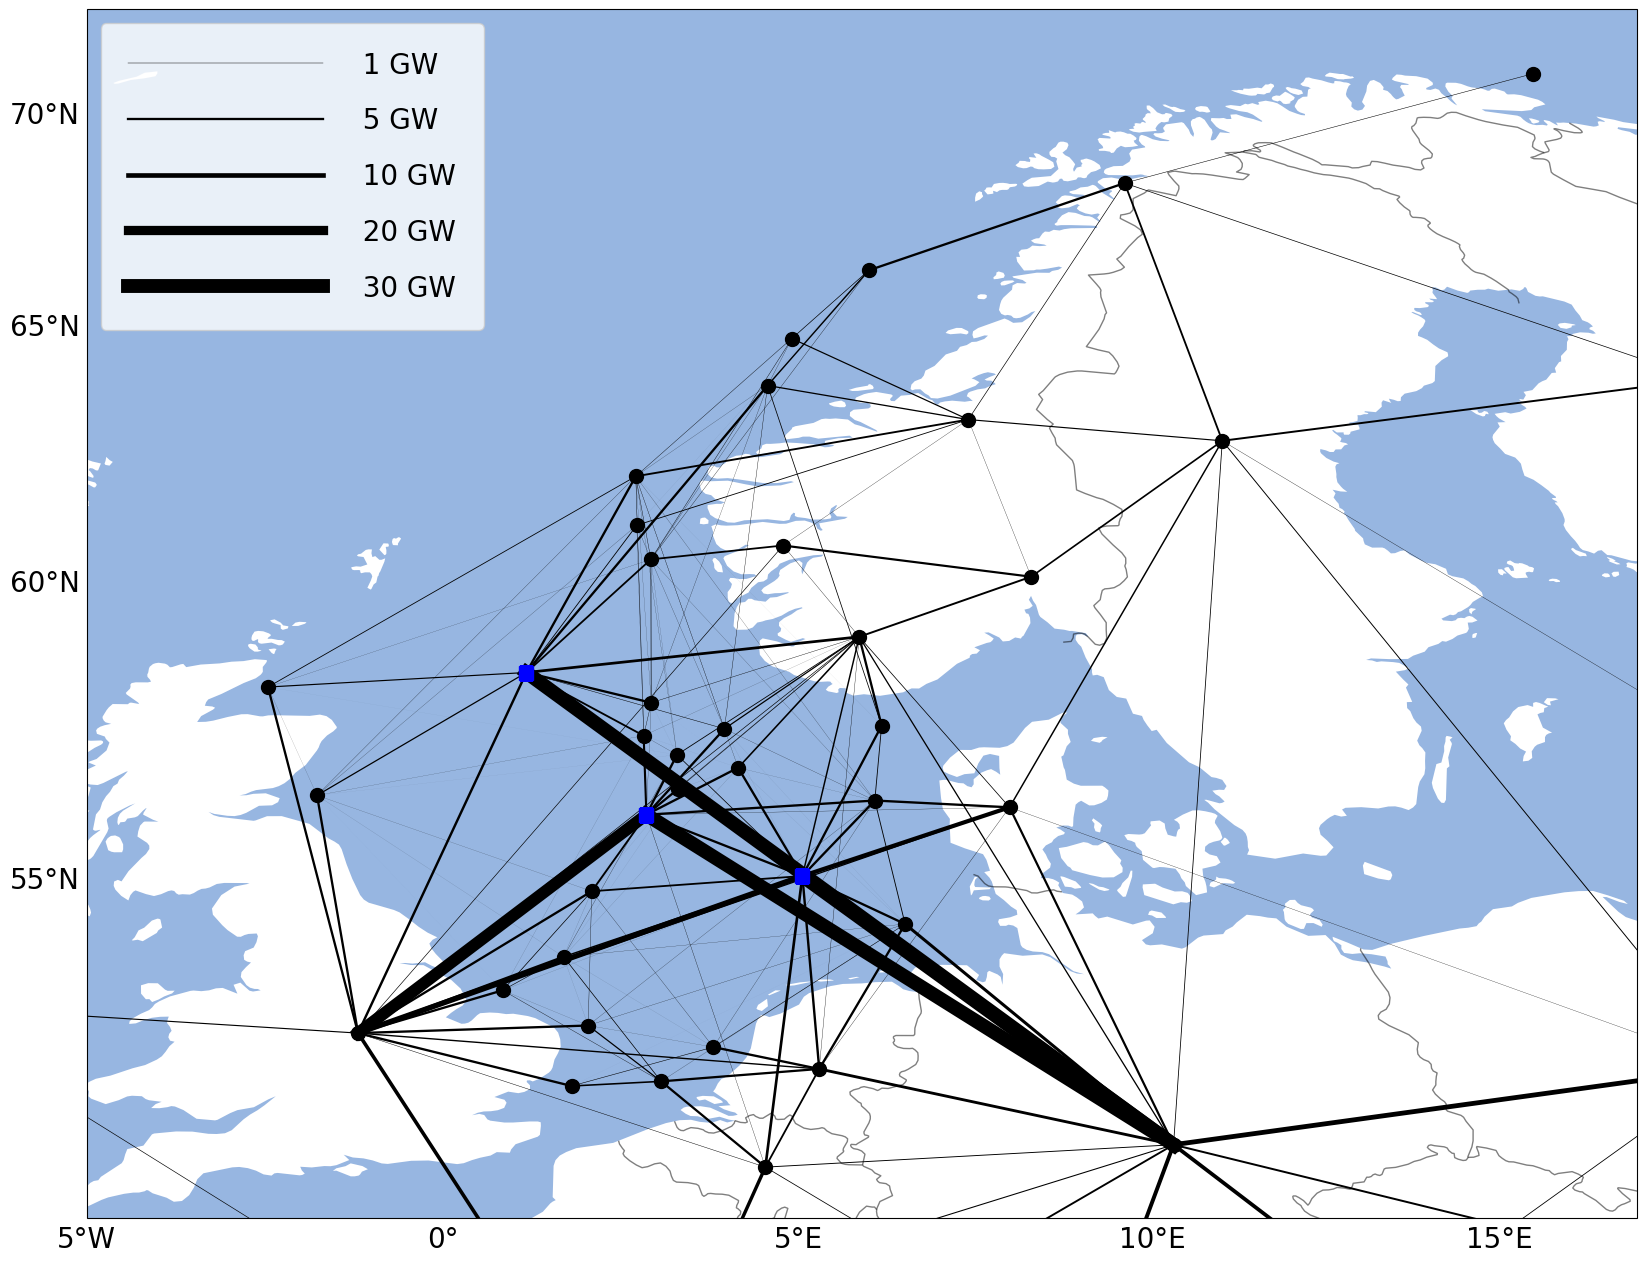

Transmission capacity North Sea in 2050 for case: NOgrid


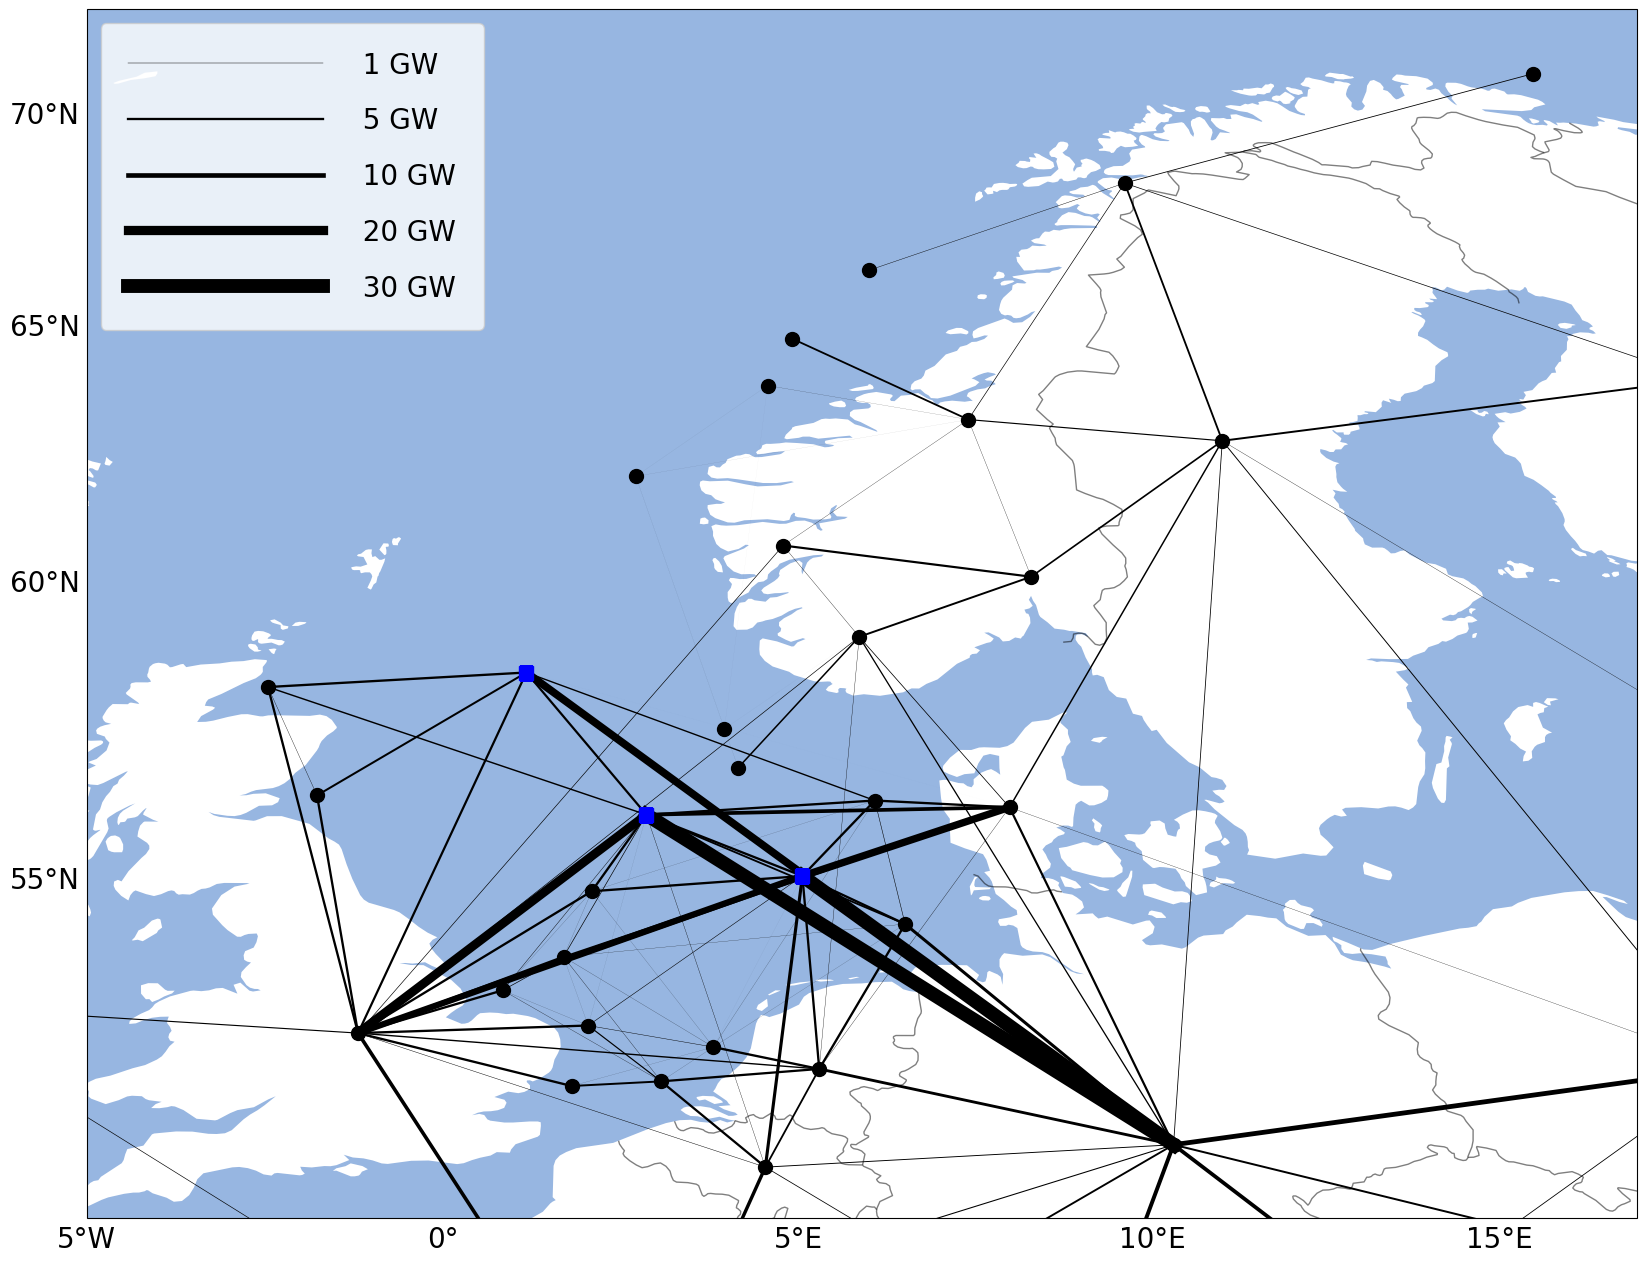

In [18]:
for case, _df in DF_BY_CASES.items():
    plot_transmission_lines_NS(case, _df)